In [1]:
!pip install matplotlib

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 학습 자동 중단
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
import os
import PIL
import shutil

In [29]:
#from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# 기본 경로
train_dir = '/content/gdrive/MyDrive/casting/train'
validation_dir = '/content/gdrive/MyDrive/casting/validation'
test_dir = '/content/gdrive/MyDrive/casting/test'

# 훈련용 O/X 이미지 경로
train_o_dir = train_dir + '/O'
train_x_dir = train_dir + '/X'
print(train_o_dir, train_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = validation_dir + '/O'
validation_x_dir = validation_dir + '/X'
print(validation_o_dir, validation_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = test_dir + '/O'
test_x_dir = test_dir + '/X'
print(test_o_dir, test_x_dir)

/content/gdrive/MyDrive/casting/train/O /content/gdrive/MyDrive/casting/train/X
/content/gdrive/MyDrive/casting/validation/O /content/gdrive/MyDrive/casting/validation/X
/content/gdrive/MyDrive/casting/test/O /content/gdrive/MyDrive/casting/test/X


In [11]:
# 이미지 파일 이름 조회
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)

validation_o_fnames = os.listdir(validation_o_dir)
validation_x_fnames = os.listdir(validation_x_dir)
print(validation_o_fnames)
print(validation_x_fnames)

test_o_fnames = os.listdir(test_o_dir)
test_x_fnames = os.listdir(test_x_dir)
print(train_o_fnames)
print(train_x_fnames)

['cast_O (169).jpeg', 'cast_O (167).jpeg', 'cast_O (163).jpeg', 'cast_O (164).jpeg', 'cast_O (168).jpeg', 'cast_O (166).jpeg', 'cast_O (165).jpeg', 'cast_O (161).jpeg', 'cast_O (160).jpeg', 'cast_O (162).jpeg', 'cast_O (159).jpeg', 'cast_O (158).jpeg', 'cast_O (155).jpeg', 'cast_O (156).jpeg', 'cast_O (157).jpeg', 'cast_O (154).jpeg', 'cast_O (153).jpeg', 'cast_O (150).jpeg', 'cast_O (151).jpeg', 'cast_O (152).jpeg', 'cast_O (149).jpeg', 'cast_O (148).jpeg', 'cast_O (147).jpeg', 'cast_O (146).jpeg', 'cast_O (142).jpeg', 'cast_O (140).jpeg', 'cast_O (144).jpeg', 'cast_O (145).jpeg', 'cast_O (143).jpeg', 'cast_O (141).jpeg', 'cast_O (233).jpeg', 'cast_O (235).jpeg', 'cast_O (230).jpeg', 'cast_O (231).jpeg', 'cast_O (232).jpeg', 'cast_O (227).jpeg', 'cast_O (222).jpeg', 'cast_O (229).jpeg', 'cast_O (226).jpeg', 'cast_O (225).jpeg', 'cast_O (224).jpeg', 'cast_O (228).jpeg', 'cast_O (223).jpeg', 'cast_O (220).jpeg', 'cast_O (221).jpeg', 'cast_O (219).jpeg', 'cast_O (218).jpeg', 'cast_O (214

In [12]:
# 각 디렉토리별 이미지 개수 확인
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total validation o images :', len(os.listdir(validation_o_dir)))
print('Total validation x images :', len(os.listdir(validation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

Total training o images : 380
Total training x images : 579
Total validation o images : 75
Total validation x images : 114
Total test o images : 54
Total test x images : 78


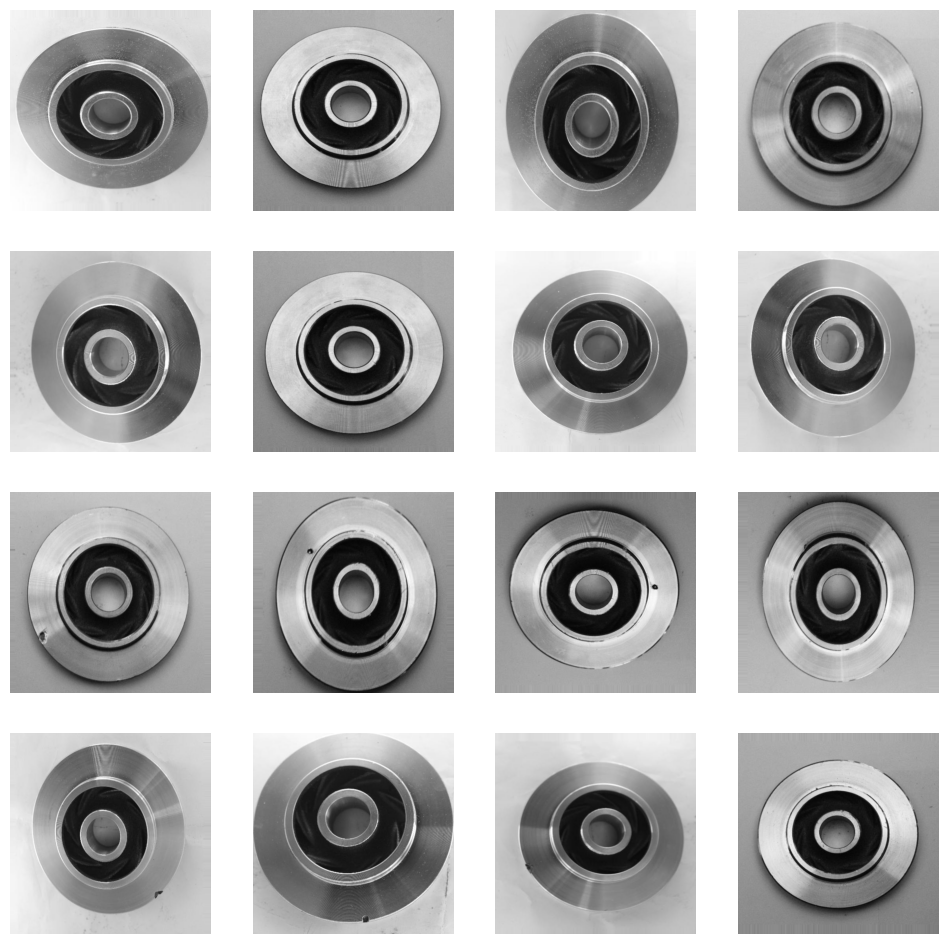

In [13]:
nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show() #사진 출력

In [14]:
# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  )
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=30, # 원본 소스에서 한 번에 얼마만큼의 이미지 데이터를 가져올 것인지
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary',
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=18,
                                                              color_mode='grayscale',
                                                              class_mode='binary',
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=18,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.
#총 102개의 데이터를 인식했고, 2개의 classes로 분류하였습니다.
#앞서 말했지만, O, X 각 폴더의 이름을 'O', 'X'로 명명하였습니다.
#ImageDataGenerator가 각 분류 데이터를 읽어올 때,
#폴더별로 category를 자동으로 인식합니다.

# class 확인
train_generator.class_indices

Found 959 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


{'O': 0, 'X': 1}

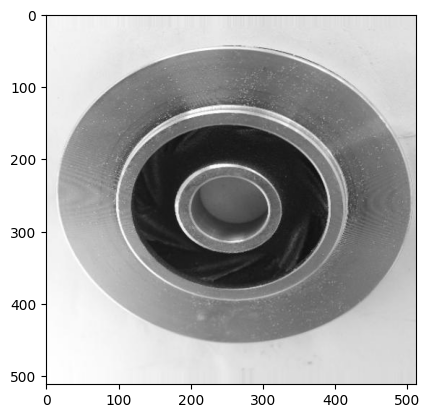

In [22]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

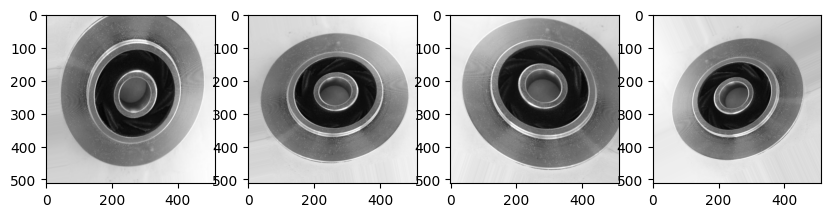

In [23]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [24]:
# 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 32)       

In [25]:
# 모델 학습 컴파일 메서드를 이용 손실 함수와 옵티마이저 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

# 20번이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [26]:
# 모델 훈련
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=2000, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

<ipython-input-26-eff7eabc7641>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/2000
4/4 - 49s - loss: 0.8686 - accuracy: 0.5250 - val_loss: 0.6763 - val_accuracy: 0.6250 - 49s/epoch - 12s/step
Epoch 2/2000
4/4 - 36s - loss: 0.6958 - accuracy: 0.5500 - val_loss: 0.6683 - val_accuracy: 0.5694 - 36s/epoch - 9s/step
Epoch 3/2000
4/4 - 21s - loss: 0.6365 - accuracy: 0.6417 - val_loss: 0.6687 - val_accuracy: 0.7083 - 21s/epoch - 5s/step
Epoch 4/2000
4/4 - 14s - loss: 0.6679 - accuracy: 0.5917 - val_loss: 0.6308 - val_accuracy: 0.8333 - 14s/epoch - 4s/step
Epoch 5/2000
4/4 - 11s - loss: 0.6555 - accuracy: 0.6500 - val_loss: 0.6310 - val_accuracy: 0.5694 - 11s/epoch - 3s/step
Epoch 6/2000
4/4 - 8s - loss: 0.6292 - accuracy: 0.6417 - val_loss: 0.7464 - val_accuracy: 0.5694 - 8s/epoch - 2s/step
Epoch 7/2000
4/4 - 8s - loss: 0.6091 - accuracy: 0.6667 - val_loss: 0.5847 - val_accuracy: 0.6250 - 8s/epoch - 2s/step
Epoch 8/2000
4/4 - 7s - loss: 0.6454 - accuracy: 0.5966 - val_loss: 0.6278 - val_accuracy: 0.7083 - 7s/epoch - 2s/step
Epoch 9/2000
4/4 - 7s - loss: 0.6430 

In [31]:
# 모델 성능 평가
model.evaluate(train_generator)
model.evaluate(validation_generator)

11/11 [==============================] - 2s 144ms/step - loss: 3.5066e-04 - accuracy: 1.0000


[0.00035066422424279153, 1.0]

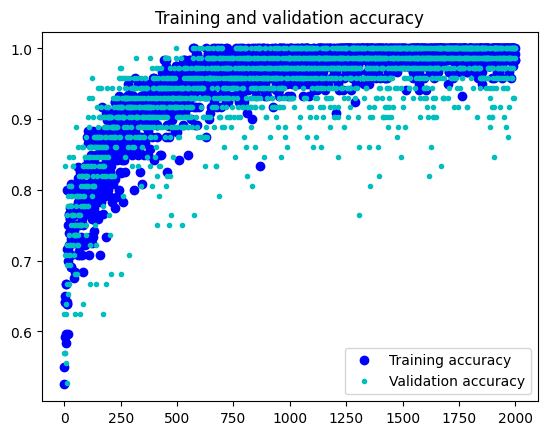

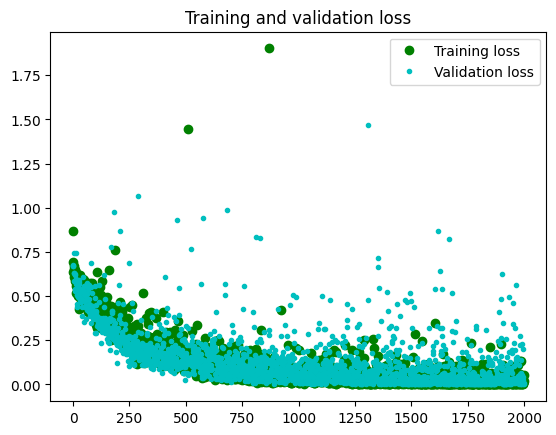

2000


In [32]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'c.', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'c.', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(len(acc))

1/1 [==============================] - 0s 27ms/step


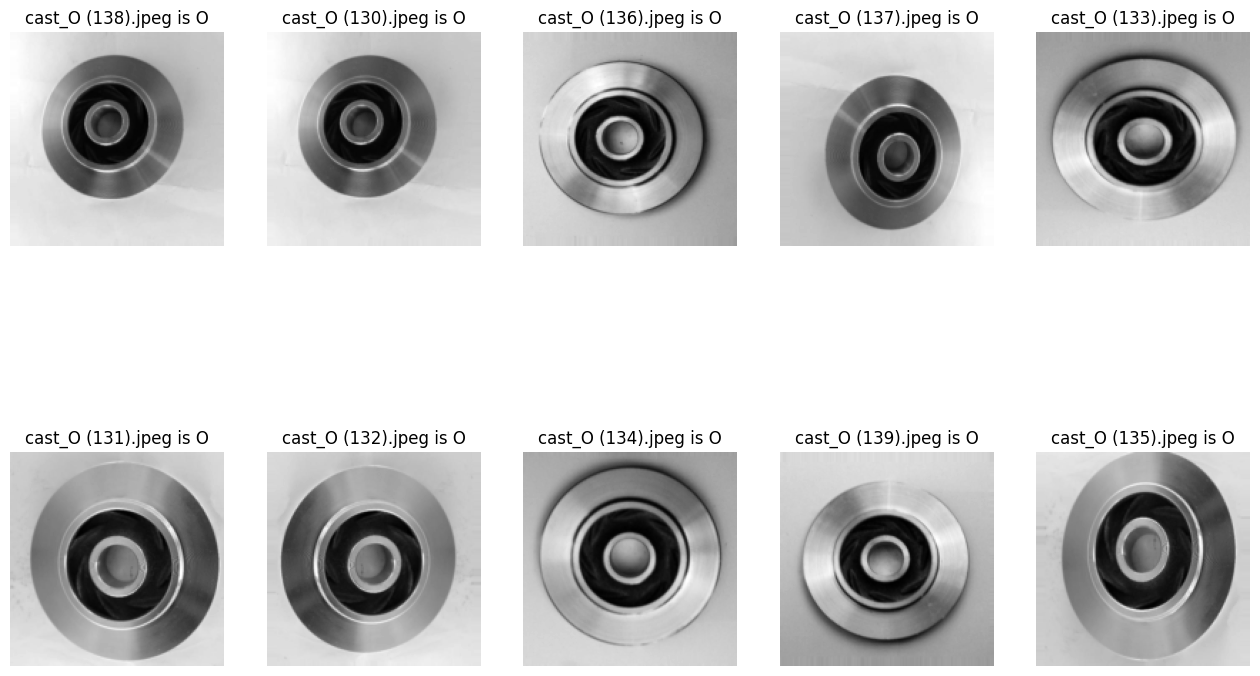

1/1 [==============================] - 0s 27ms/step


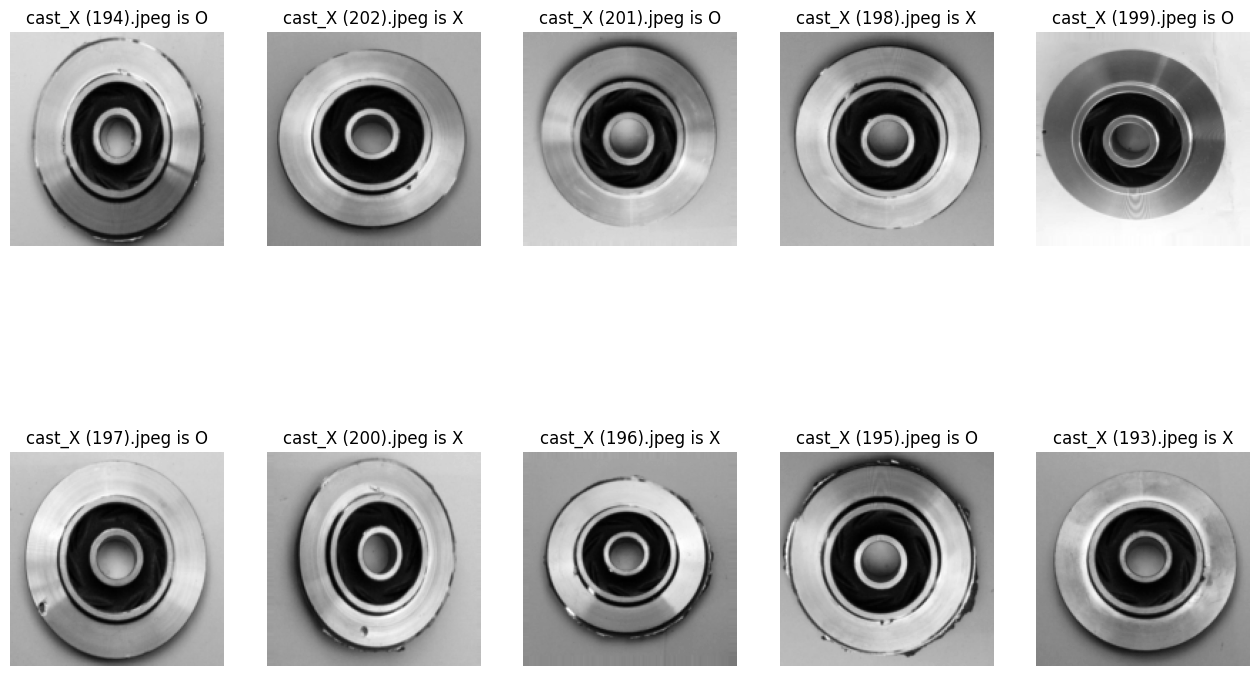

In [33]:
# 이제 테스트 이미지 분류
import numpy as np
from keras.preprocessing import image

#테스트 경로용
test_dir = '/content/gdrive/MyDrive/casting/OX_images/'
# 테스트용 O 이미지 경로 설정
test_o_dir = os.path.join(test_dir, 'O/')
test_o_filenames = os.listdir(test_o_dir)
test_o_filenames

# 테스트용 X 이미지 경로 설정
test_x_dir = os.path.join(test_dir, 'X/')
test_x_filenames = os.listdir(test_x_dir)
test_x_filenames

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames

# O/X 분류 테스트
for ox, filenames in dic_ox_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 2, 5
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '/' + fn
        test_img = image.load_img(path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)

        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            plt.title(fn + " is O")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')

        else:
            plt.title(fn + " is X")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();

In [34]:
# 모델 성능 평가
model.evaluate(test_generator)

8/8 [==============================] - 31s 4s/step - loss: 0.0011 - accuracy: 1.0000


[0.0011394162429496646, 1.0]

In [52]:
from tensorflow.keras.models import load_model

# Save the entire model as a `.keras` zip archive.
model.save("/content/gdrive/MyDrive/casting/Case_cnn.h5")


In [47]:
# 저장한 모델 다시 불러와서 확인하기
new_model = load_model('./Test0321_cnn.h5')

# Check its architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 32)       

In [48]:
# 정확도 확인하기
loss, acc = new_model.evaluate(train_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(train_generator).shape)

32/32 - 12s - loss: 0.0421 - accuracy: 0.9875 - 12s/epoch - 364ms/step
Restored model, accuracy: 98.75%
32/32 [==============================] - 11s 329ms/step
(959, 1)
